In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
X = np.array([-2, -1, 0, 1, 2, 3, 4]).reshape(-1, 1)
y = np.array([-1, -1, 1, 1, 1, -1, -1])

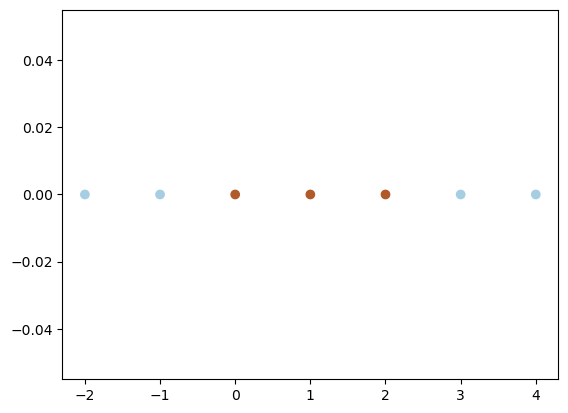

In [3]:
plt.scatter(X.flatten(), np.zeros_like(X), c=y, cmap=cm.Paired)

In [5]:
def phi(x):
    return np.hstack([x, x**2])

In [6]:
phi(X)

array([[-2,  4],
       [-1,  1],
       [ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

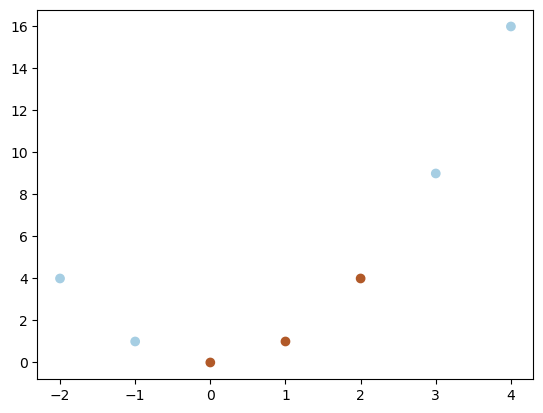

In [7]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y,cmap = cm.Paired)

In [8]:
from sklearn.svm import SVC

In [9]:
c = SVC(C=1, kernel='linear')

In [10]:
c.fit(phi(X), y)

SVC(C=1, kernel='linear')

Text(0.5, 1.0, 'Decision surface: 1.3*x_1 + -0.7*x_2 + 1.0 = 0')

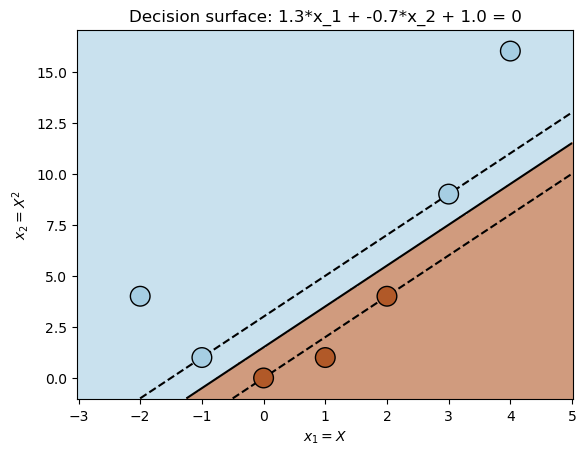

In [11]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=200)
x_min = phi(X)[:, 0].min()-1
x_max = phi(X)[:, 0].max()+1
y_min = phi(X)[:, 1].min()-1
y_max = phi(X)[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = c.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.xlabel(r"$x_1 = X$")
plt.ylabel(r"$x_2 = X^2$")
plt.title(r"Decision surface: {:0.1f}*x_1 + {:0.1f}*x_2 + {:0.1f} = 0".format(c.coef_[0, 0], c.coef_[0, 1], c.intercept_[0]))

In [27]:
# Fit a SVM with polynomial kernel

c = SVC(C=1, kernel='poly', degree=2)

c.fit(X, y)


SVC(C=1, degree=2, kernel='poly')